# Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas
You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards
You need to identify the best possible model that will give the required performance

Objective
	1. Explore and visualize the dataset.
	2. Build a classification model to predict if the customer is going to churn or not
	3. Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

Data Dictionary:
	• CLIENTNUM: Client number. Unique identifier for the customer holding the account
	• Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else 

"Existing Customer"
	• Customer_Age: Age in Years
	• Gender: Gender of the account holder
	• Dependent_count: Number of dependents
	• Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
	• Marital_Status: Marital Status of the account holder
	• Income_Category: Annual Income Category of the account holder
	• Card_Category: Type of Card
	• Months_on_book: Period of relationship with the bank
	• Total_Relationship_Count: Total no. of products held by the customer
	• Months_Inactive_12_mon: No. of months inactive in the last 12 months
	• Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
	• Credit_Limit: Credit Limit on the Credit Card
	• Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
	• Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
	• Total_Trans_Amt: Total Transaction Amount (Last 12 months)
	• Total_Trans_Ct: Total Transaction Count (Last 12 months)
	• Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
	• Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
	• Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [108]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

# from xgboost import XGBClassifier

# To use statistical functions
import scipy.stats as stats

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress the warning
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Load and Explore Data

In [109]:
df = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [110]:
data = df.copy()

<IPython.core.display.Javascript object>

In [111]:
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

In [112]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [7]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

In [8]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

Education_Level column has 15% missing values and Marital_Status has 7.4% missing values

Drop cliebtnum column as it will not add any significant value for model development

In [9]:
data.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [11]:
data.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                6
Marital_Status                 3
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.000,0.760,0.219,0.000,0.631,0.736,0.859,3.397


<IPython.core.display.Javascript object>

We can clearly see some column like credit_limit data have outliers but others don't

In [13]:
# Making a list of all catrgorical variables
cat_col = [
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------
3    2305
4    1912
5

<IPython.core.display.Javascript object>

There are 1112 records with "abc" as income category. We need to take a closer look and treat them as needed

In [14]:
data[data["Income_Category"] == "abc"]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,Existing Customer,45,F,2,Graduate,Married,abc,Blue,37,6,1,2,14470.000,1157,13313.000,0.966,1207,21,0.909,0.080
28,Existing Customer,44,F,3,Uneducated,Single,abc,Blue,34,5,2,2,10100.000,0,10100.000,0.525,1052,18,1.571,0.000
39,Attrited Customer,66,F,0,Doctorate,Married,abc,Blue,56,5,4,3,7882.000,605,7277.000,1.052,704,16,0.143,0.077
44,Existing Customer,38,F,4,Graduate,Single,abc,Blue,28,2,3,3,9830.000,2055,7775.000,0.977,1042,23,0.917,0.209
58,Existing Customer,44,F,5,Graduate,Married,abc,Blue,35,4,1,2,6273.000,978,5295.000,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,Attrited Customer,30,F,1,Graduate,Married,abc,Blue,18,4,1,4,4377.000,2517,1860.000,0.941,8759,74,0.609,0.575
10040,Attrited Customer,50,F,3,Doctorate,Single,abc,Blue,36,4,3,3,5173.000,0,5173.000,0.912,8757,68,0.789,0.000
10083,Existing Customer,42,F,4,Uneducated,Married,abc,Blue,23,4,1,2,8348.000,0,8348.000,0.695,15905,111,0.708,0.000
10092,Attrited Customer,40,F,3,Graduate,Married,abc,Blue,25,1,2,3,6888.000,1878,5010.000,1.059,9038,64,0.829,0.273


<IPython.core.display.Javascript object>

Looking at the data, they all seems ligitimate. But in order to issue a credit card, income is one of the key factor. We can change that to "Nan" to consider as missing value and later impute with most_frequent income category

In [15]:
data["Income_Category"] = data["Income_Category"].replace({"abc": np.nan})

<IPython.core.display.Javascript object>

In [16]:
# confirm all are converted as missing values
data["Income_Category"].isnull().sum()

1112

<IPython.core.display.Javascript object>

# EDA

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

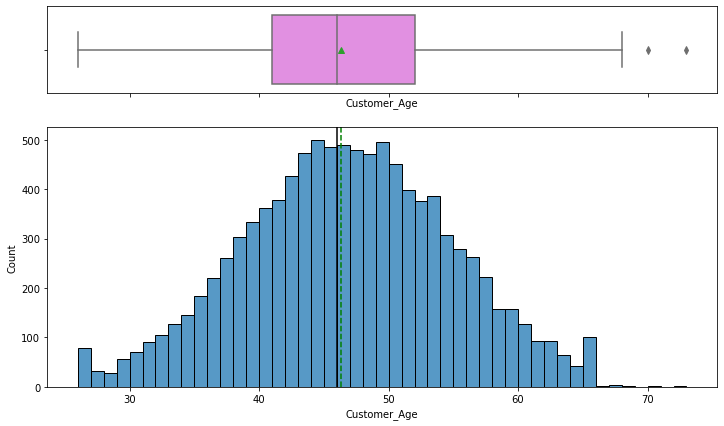

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Customer_Age")

Age has a fairly normal distribution with approx equal mean and median
We can see there are some outliers in the age variable.
We can remove the data point on the extreme right end of the boxplot as it can be a data entry error.

In [19]:
data[data["Customer_Age"] > 70]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
251,Existing Customer,73,M,0,High School,Married,$40K - $60K,Blue,36,5,3,2,4469.000,1125,3344.000,1.363,1765,34,1.615,0.252


<IPython.core.display.Javascript object>

In [20]:
# Dropping observaion with age greater than 70. Since there is just 1 such observation
data.drop(index=data[data.Customer_Age > 70].index, inplace=True)

<IPython.core.display.Javascript object>

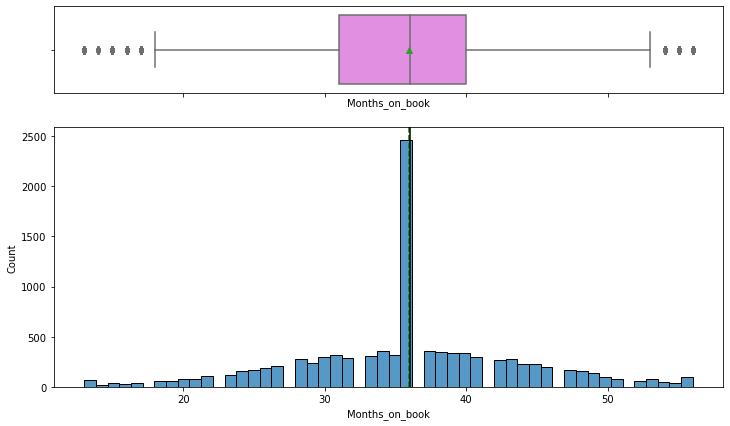

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "Months_on_book")

Age has a fairly normal distribution with approx equal mean and median
We can see there are some outliers at both end of months_on_book variable.

In [22]:
data[data["Months_on_book"] > 55]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
18,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,2,2,3,3193.000,2517,676.000,1.831,1336,30,1.143,0.788
27,Existing Customer,63,M,1,NaN,Married,$60K - $80K,Blue,56,3,3,2,10215.000,1010,9205.000,0.843,1904,40,1.000,0.099
39,Attrited Customer,66,F,0,Doctorate,Married,NaN,Blue,56,5,4,3,7882.000,605,7277.000,1.052,704,16,0.143,0.077
108,Existing Customer,62,F,1,NaN,Married,Less than $40K,Blue,56,6,0,0,1438.300,0,1438.300,0.813,1951,44,1.095,0.000
151,Existing Customer,68,M,1,Graduate,Married,NaN,Blue,56,5,2,3,13860.000,1652,12208.000,1.255,1910,32,1.909,0.119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,Existing Customer,63,F,0,Uneducated,Single,Less than $40K,Blue,56,2,2,2,7264.000,851,6413.000,0.814,3527,69,0.816,0.117
8602,Existing Customer,61,F,1,High School,Single,Less than $40K,Blue,56,3,2,2,3421.000,2266,1155.000,0.659,6932,75,0.744,0.662
8634,Existing Customer,62,M,2,Graduate,Single,$60K - $80K,Blue,56,2,3,2,18224.000,1383,16841.000,0.705,7728,93,0.576,0.076
8955,Existing Customer,62,M,0,Graduate,Divorced,$60K - $80K,Blue,56,1,3,3,6103.000,2517,3586.000,0.740,8080,92,0.704,0.412


<IPython.core.display.Javascript object>

Looking at the values for Months_on_book for these 103 observations need not be incorrect.
So, dropping them will lead us to loss of information
Let's cap them with 55

In [23]:
data["Months_on_book"].clip(upper=55, inplace=True)

<IPython.core.display.Javascript object>

In [24]:
data.Months_on_book.nsmallest(10)

514     13
521     13
560     13
890     13
964     13
1066    13
1118    13
1205    13
1265    13
1276    13
Name: Months_on_book, dtype: int64

<IPython.core.display.Javascript object>

In [25]:
data[data["Months_on_book"] < 15]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
514,Existing Customer,33,M,2,Graduate,Married,$60K - $80K,Blue,13,3,3,3,1963.000,1721,242.000,0.680,1378,37,0.762,0.877
521,Existing Customer,26,M,0,Graduate,Single,Less than $40K,Blue,13,6,3,2,2585.000,2019,566.000,0.525,2644,40,0.481,0.781
560,Existing Customer,26,M,0,Graduate,Single,$40K - $60K,Blue,13,6,1,2,3290.000,1616,1674.000,0.466,2781,54,0.350,0.491
890,Existing Customer,30,F,0,Graduate,Divorced,NaN,Blue,13,5,1,2,7772.000,1890,5882.000,0.754,2585,75,0.829,0.243
964,Existing Customer,34,M,0,High School,Married,$40K - $60K,Blue,13,3,3,2,3870.000,1394,2476.000,0.827,1588,36,0.714,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,Attrited Customer,31,F,1,Graduate,Single,Less than $40K,Blue,13,1,1,3,4829.000,0,4829.000,0.836,8286,65,0.857,0.000
9915,Existing Customer,27,M,0,Graduate,Single,Less than $40K,Blue,13,2,2,4,3585.000,2420,1165.000,0.812,15656,124,0.746,0.675
9929,Existing Customer,30,M,2,Uneducated,Single,$60K - $80K,Blue,13,3,2,3,4107.000,979,3128.000,0.647,14596,104,0.733,0.238
9934,Existing Customer,36,M,3,Graduate,Married,$60K - $80K,Silver,13,4,3,2,28174.000,1173,27001.000,0.779,16258,108,0.714,0.042


<IPython.core.display.Javascript object>

The values for Months_on_book for these 86 observations need not be incorrect as well. Utilization may be lower or higher during initial period. So, dropping them will lead us to loss of information.
Let's cap them with 15

In [26]:
data["Months_on_book"].clip(lower=15, inplace=True)

<IPython.core.display.Javascript object>

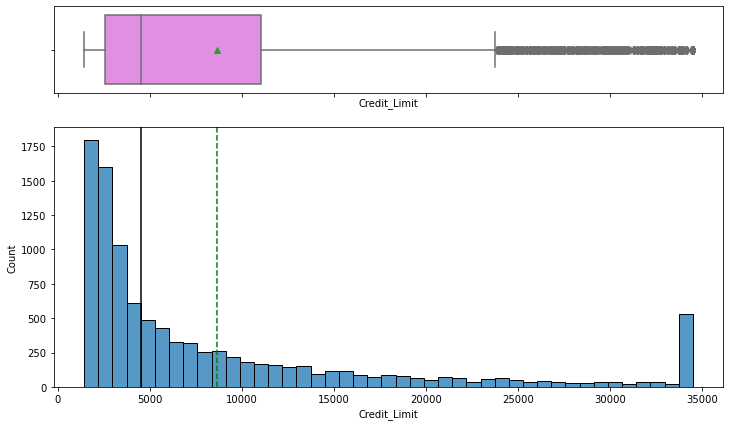

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "Credit_Limit")

The distribution for the Credit_Limit is highly skewed to the right.
There are some outliers on the right end of the boxplot but we will not treat them as some variation is always expected in real-world scenarios for variables like credit limit as it is capped based on other parameters like income, revolving usage etc.,.

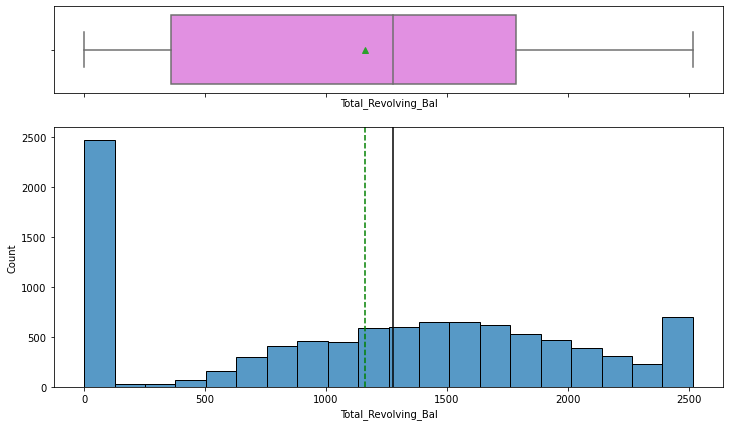

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Total_Revolving_Bal")

There are no outliers in the 'Total_Revolving_Bal' variable
The distribution is fairly symmetric.

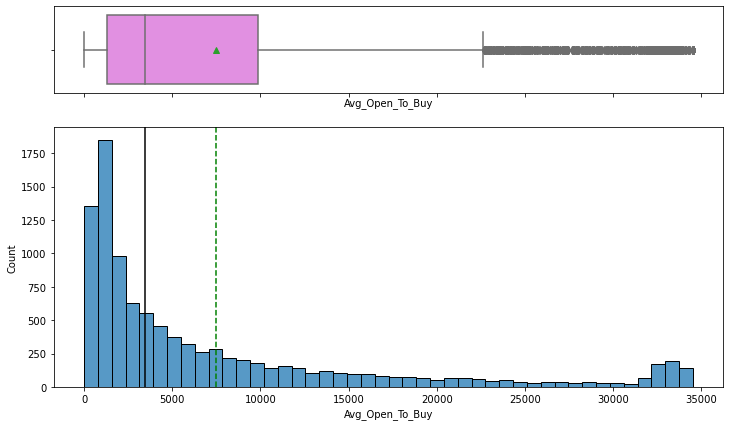

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "Avg_Open_To_Buy")

The distribution for the Credit_Limit is highly skewed to the right
There are some outliers on the right end of the boxplot but we will not treat them as some variation is always expected.

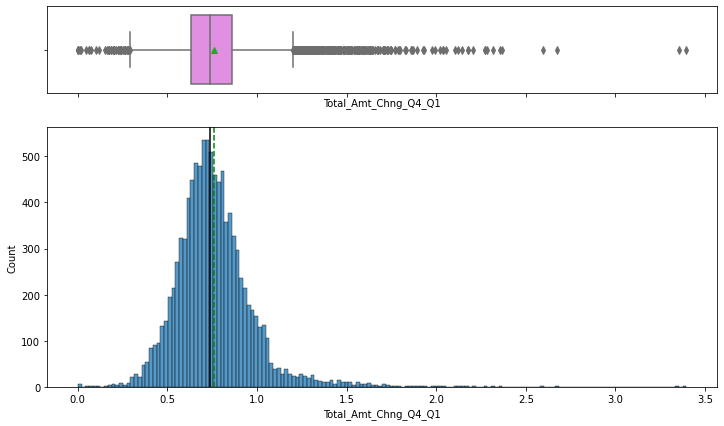

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

Total_Amt_Chng_Q4_Q1 ratio has a fairly normal distribution with approx equal mean and median
We can see there are some outliers at both side in this variable but we will not treat them all as some variation is always expected.

In [31]:
data[data["Total_Amt_Chng_Q4_Q1"] > 2.3]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,3.397,1539,17,3.250,0.000
46,Existing Customer,56,M,2,Doctorate,Married,$60K - $80K,Blue,45,6,2,0,2283.000,1430,853.000,2.316,1741,27,0.588,0.626
47,Existing Customer,59,M,1,Doctorate,Married,$40K - $60K,Blue,52,3,2,2,2548.000,2020,528.000,2.357,1719,27,1.700,0.793
219,Existing Customer,44,F,3,Uneducated,Divorced,Less than $40K,Silver,38,4,1,3,11127.000,1835,9292.000,2.368,1546,25,1.273,0.165
773,Existing Customer,61,M,0,Post-Graduate,Married,NaN,Blue,53,6,2,3,14434.000,1927,12507.000,2.675,1731,32,3.571,0.134


<IPython.core.display.Javascript object>

In [32]:
data.Total_Amt_Chng_Q4_Q1.nlargest(10)

12    3.397
8     3.355
773   2.675
2     2.594
219   2.368
47    2.357
46    2.316
658   2.282
58    2.275
466   2.271
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

<IPython.core.display.Javascript object>

The values for Total_Amt_Chng_Q4_Q1 for these 7 observations need not be incorrect
Dropping them may lead us to loss of information
Let's cap them with next highest value

In [33]:
# Capping values for Total_Amt_Chng_Q4_Q1 at next highest value i.e. 2.5
data["Total_Amt_Chng_Q4_Q1"].clip(upper=2.5, inplace=True)

<IPython.core.display.Javascript object>

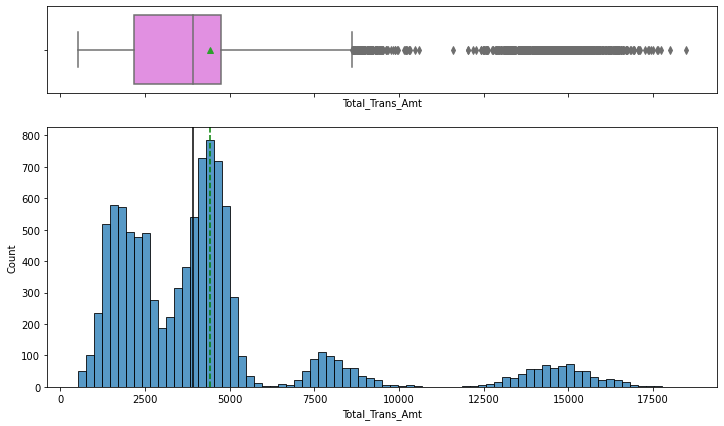

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "Total_Trans_Amt")

Total_Trans_Amt ratio has is highly skewed to the right
We can see there are some outliers at both side in this variable but we will not treat them all as some variation is always expected.

In [35]:
data[data["Total_Trans_Amt"] > 17300]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9341,Existing Customer,48,M,2,High School,Married,Less than $40K,Silver,36,2,2,2,14581.000,2517,12064.000,0.776,17628,109,0.817,0.173
9601,Existing Customer,45,M,4,High School,Single,$60K - $80K,Blue,35,1,1,3,8449.000,2092,6357.000,0.709,17634,120,0.667,0.248
9643,Existing Customer,54,F,2,Graduate,Married,$40K - $60K,Blue,41,3,1,3,7362.000,1176,6186.000,0.735,17390,130,0.688,0.160
9712,Existing Customer,49,M,4,Post-Graduate,Single,$80K - $120K,Blue,42,3,2,1,30885.000,2018,28867.000,0.904,17350,115,0.620,0.065
9964,Existing Customer,47,M,4,NaN,Married,$60K - $80K,Blue,36,4,5,2,10585.000,1749,8836.000,0.655,18484,108,0.588,0.165
10028,Existing Customer,36,F,1,Graduate,Single,Less than $40K,Blue,16,6,5,3,6091.000,1184,4907.000,0.766,17437,113,0.766,0.194
10073,Existing Customer,51,M,2,Graduate,Married,$60K - $80K,Blue,40,3,3,3,3750.000,1801,1949.000,0.889,17995,116,0.657,0.480
10097,Existing Customer,31,M,0,High School,Single,$40K - $60K,Blue,25,3,2,3,4493.000,1388,3105.000,0.795,17744,104,0.763,0.309
10117,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106


<IPython.core.display.Javascript object>

In [36]:
data.Total_Trans_Amt.nlargest(10)

9964     18484
10073    17995
10097    17744
9601     17634
9341     17628
10117    17498
10028    17437
9643     17390
9712     17350
9645     17258
Name: Total_Trans_Amt, dtype: int64

<IPython.core.display.Javascript object>

The values for Total_Trans_Amt for these observations need not be incorrect
Dropping them may lead us to loss of information
Let's cap them with next highest value 17500

In [37]:
data["Total_Trans_Amt"].clip(upper=17500, inplace=True)

<IPython.core.display.Javascript object>

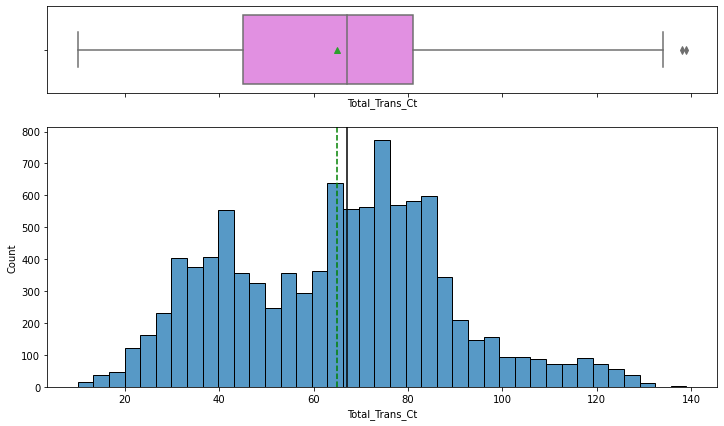

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data, "Total_Trans_Ct")

Total_Trans_Ct has a fairly normal distribution with approx equal mean and median
We can see there are some outliers in the Total_Trans_Ct variable.But we will not treat them all as some variation is always expected.
We can remove the data point on the extreme right end of the boxplot as it can be a data entry error.

In [39]:
data[data["Total_Trans_Ct"] > 135]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9324,Existing Customer,41,M,3,NaN,Married,$120K +,Blue,33,2,4,3,34516.000,638,33878.000,0.724,13085,139,0.675,0.018
9586,Existing Customer,56,F,1,High School,Married,NaN,Blue,49,1,2,1,17542.000,2517,15025.000,0.800,13939,138,0.792,0.143


<IPython.core.display.Javascript object>

In [40]:
# Dropping observaion with Total_Trans_Ct greater than 135. Since there is just 2 such observation
data.drop(index=data[data.Total_Trans_Ct > 135].index, inplace=True)

<IPython.core.display.Javascript object>

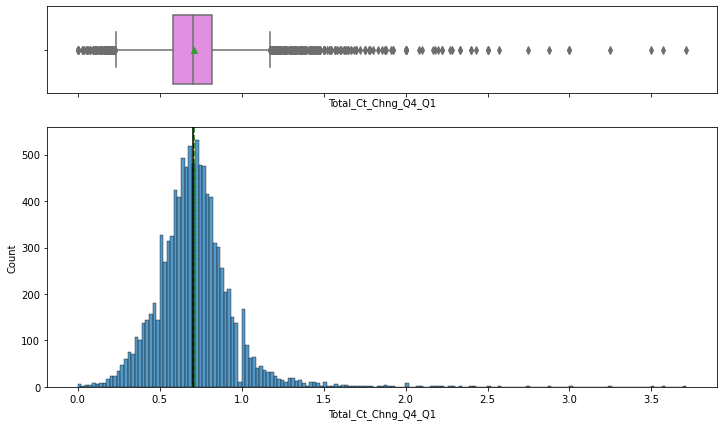

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

Total_Ct_Chng_Q4_Q1 has a fairly normal distribution with approx equal mean and median
We can see there are some outliers in the Total_Ct_Chng_Q4_Q1 variable.But we will not treat them all as some variation is always expected.
We can remove the data point on the extreme right end of the boxplot as it can be a data entry error.

In [42]:
data.Total_Ct_Chng_Q4_Q1.nlargest(10)

1     3.714
773   3.571
269   3.500
12    3.250
113   3.000
190   3.000
146   2.875
366   2.750
30    2.571
4     2.500
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

<IPython.core.display.Javascript object>

In [43]:
data[data["Total_Ct_Chng_Q4_Q1"] > 2.5]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,2.500,1539,17,3.250,0.000
30,Existing Customer,53,M,3,NaN,Married,$80K - $120K,Blue,33,3,2,3,2753.000,1811,942.000,0.977,1038,25,2.571,0.658
113,Existing Customer,54,F,0,Uneducated,Married,Less than $40K,Blue,36,2,2,2,1494.000,706,788.000,1.674,1305,24,3.000,0.473
146,Existing Customer,41,F,2,Graduate,Single,Less than $40K,Blue,32,6,3,2,2250.000,2117,133.000,1.162,1617,31,2.875,0.941
190,Existing Customer,57,M,1,Graduate,Married,$80K - $120K,Blue,47,5,3,1,14612.000,1976,12636.000,1.768,1827,24,3.000,0.135
269,Existing Customer,54,M,5,Graduate,Married,$60K - $80K,Blue,38,3,3,3,2290.000,1434,856.000,0.923,1119,18,3.500,0.626
366,Existing Customer,36,F,4,Graduate,Married,$40K - $60K,Blue,36,6,3,3,1628.000,969,659.000,0.999,1893,15,2.750,0.595
773,Existing Customer,61,M,0,Post-Graduate,Married,NaN,Blue,53,6,2,3,14434.000,1927,12507.000,2.500,1731,32,3.571,0.134


<IPython.core.display.Javascript object>

The values for Total_Ct_Chng_Q4_Q1 for these observations need not be incorrect
Dropping them may lead us to loss of information
Let's cap them with value 2.5

In [44]:
data["Total_Ct_Chng_Q4_Q1"].clip(upper=2.5, inplace=True)

<IPython.core.display.Javascript object>

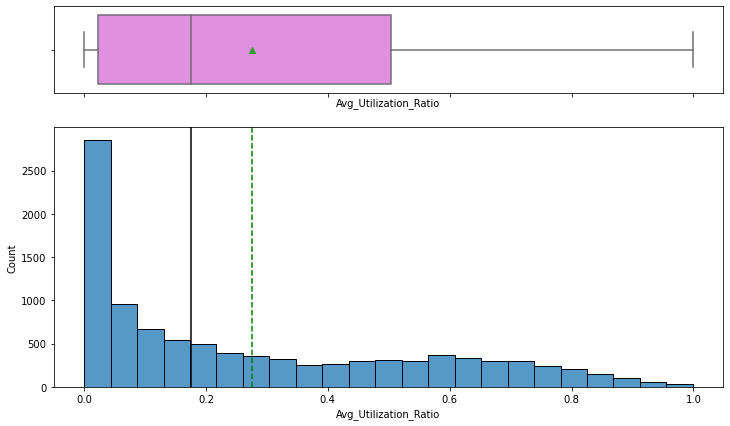

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

Avg_Utilization_Ratio istribution is rightly skewed and no outlier present in the data points

In [46]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

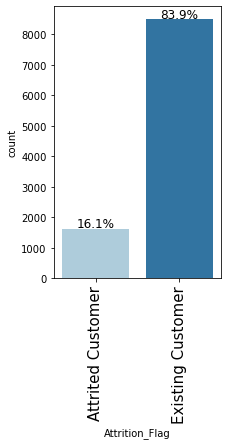

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(data, "Attrition_Flag", perc=True)

~16% customers are attrited and the bank still has ~84% using or keeping thier credit card products

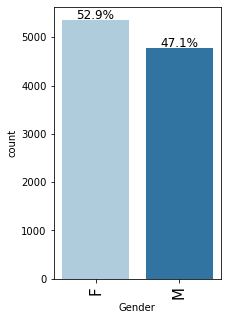

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(data, "Gender", perc=True)

Both male and female customers are almost same level with slightly higher on male side

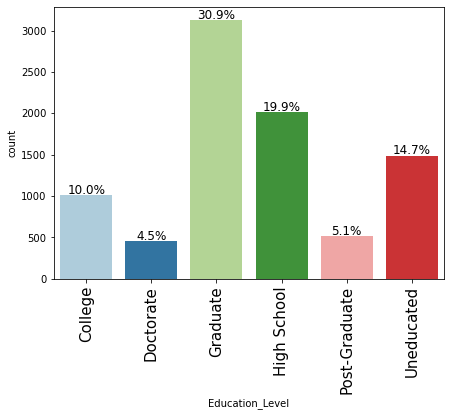

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(data, "Education_Level", perc=True)

Largest pool of customers have graduate degree while lowest pool has Doctorate

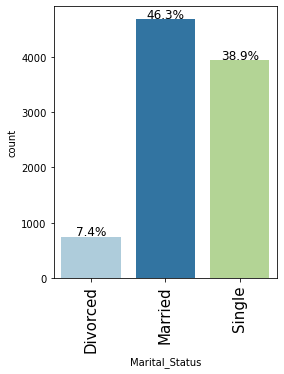

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(data, "Marital_Status", perc=True)

Married customers represent higher portion of customer base

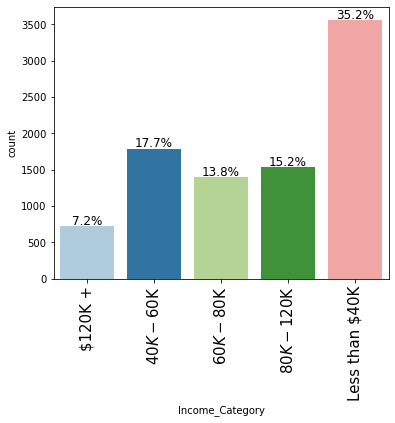

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(data, "Income_Category", perc=True)

Cusotmers who earn less than $40k are larger credit card user base for this bank

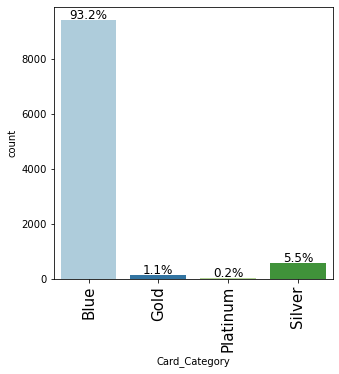

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(data, "Card_Category", perc=True)

Blue card usage is highest among the customer base

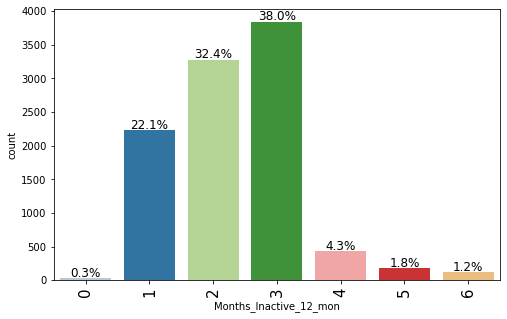

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(data, "Months_Inactive_12_mon", perc=True)

There are 38% customers inactive for atleast 3 months

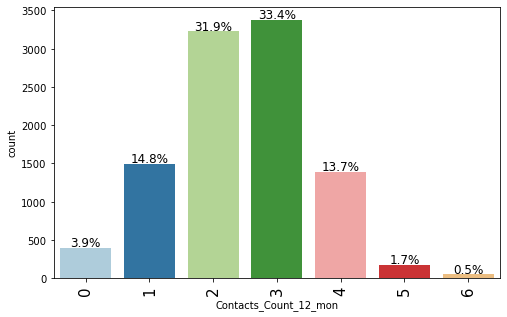

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(data, "Contacts_Count_12_mon", perc=True)

~65% customers contact bank at least twice. At the same time 0.5% contacted 6 times

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Trans_Amt'>

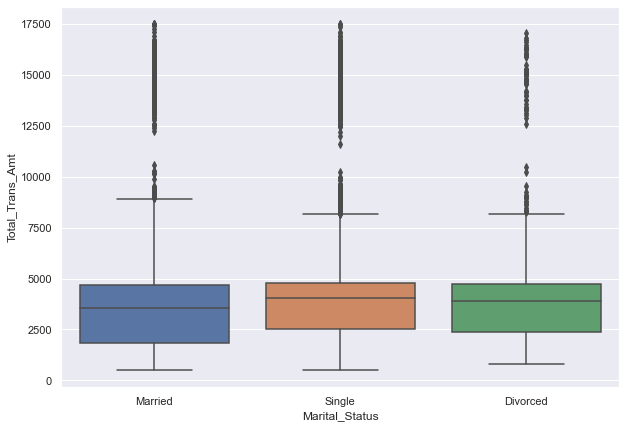

<IPython.core.display.Javascript object>

In [55]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Marital_Status", data=data, orient="vertical")

Married members are spent more using credit limits

<AxesSubplot:xlabel='Education_Level', ylabel='Total_Trans_Amt'>

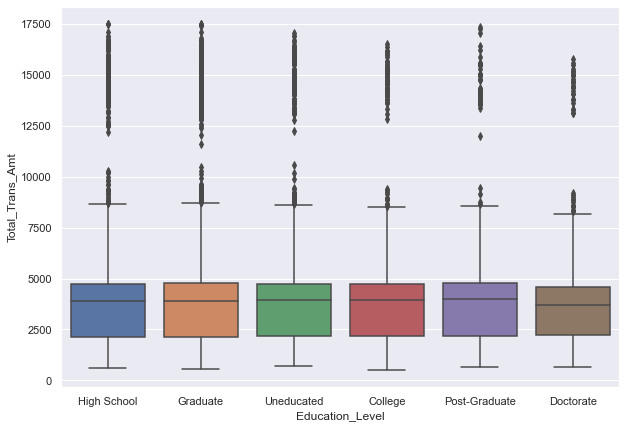

<IPython.core.display.Javascript object>

In [56]:
sns.boxplot(y="Total_Trans_Amt", x="Education_Level", data=data, orient="vertical")

Utilization almost same among diffrent education level

<AxesSubplot:xlabel='Gender', ylabel='Total_Trans_Amt'>

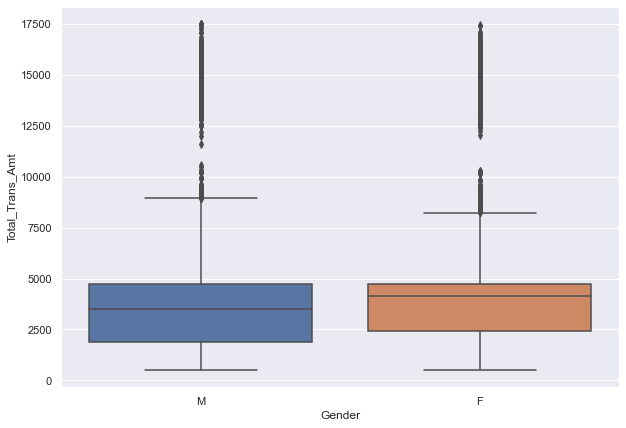

<IPython.core.display.Javascript object>

In [57]:
sns.boxplot(y="Total_Trans_Amt", x="Gender", data=data, orient="vertical")

Spending habit is slightly higher among male customers

<AxesSubplot:xlabel='Months_on_book'>

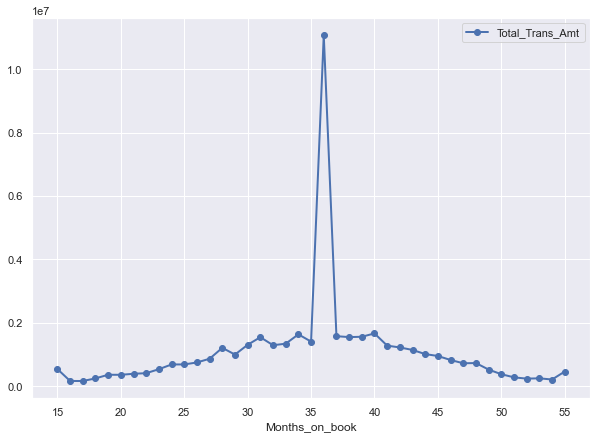

<IPython.core.display.Javascript object>

In [58]:
pd.pivot_table(
    data=data, index=["Months_on_book"], values="Total_Trans_Amt", aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2)

Utilization is higher after initial period but then card usage is slows down

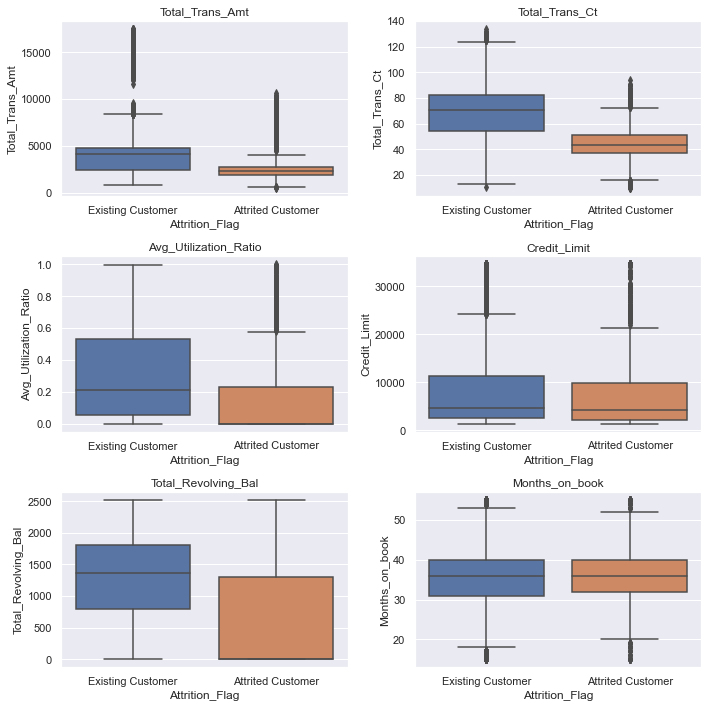

<IPython.core.display.Javascript object>

In [59]:
cols = data[
    [
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Avg_Utilization_Ratio",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Months_on_book",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

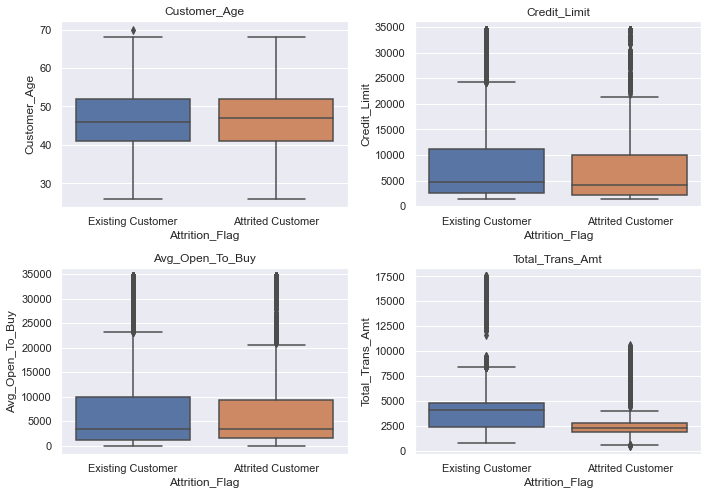

<IPython.core.display.Javascript object>

In [60]:
cols = data[
    ["Customer_Age", "Credit_Limit", "Avg_Open_To_Buy", "Total_Trans_Amt"]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [61]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8497  10124
F                             930               4427   5357
M                             697               4070   4767
------------------------------------------------------------------------------------------------------------------------


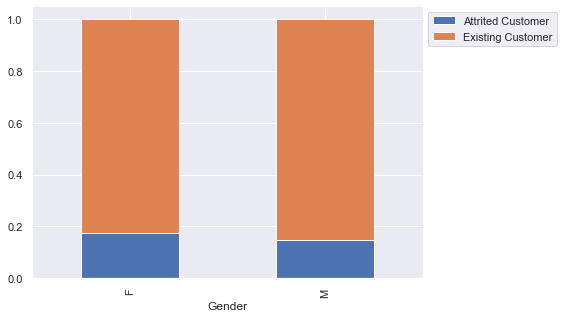

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(data, "Gender", "Attrition_Flag")

Attrition is almost same between male, female customers

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7235  8606
Graduate                       487               2641  3128
High School                    306               1705  2011
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


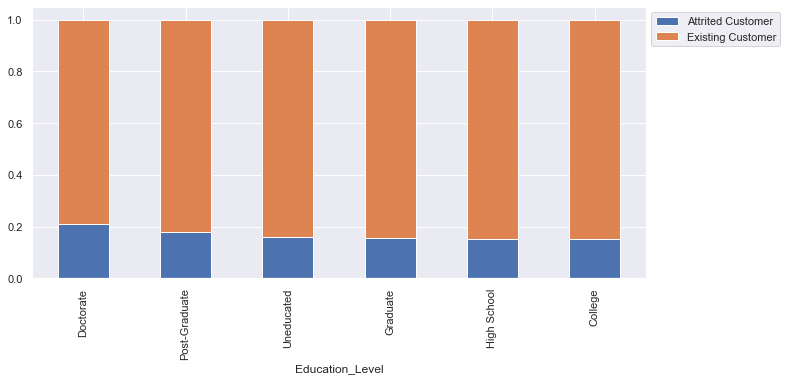

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

Attrition is almost same irrespective of education level

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8497  10124
3                              482               2249   2731
2                              417               2238   2655
1                              269               1568   1837
4                              260               1314   1574
0                              135                768    903
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


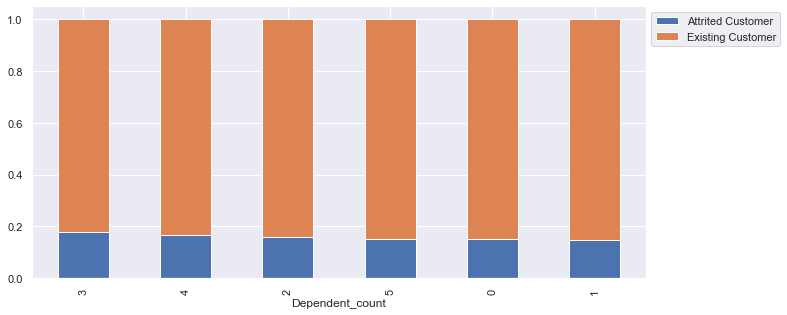

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

Attrition is almost same irrespective of how many dependents a customer has

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7877  9375
Married                       709               3975  4684
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


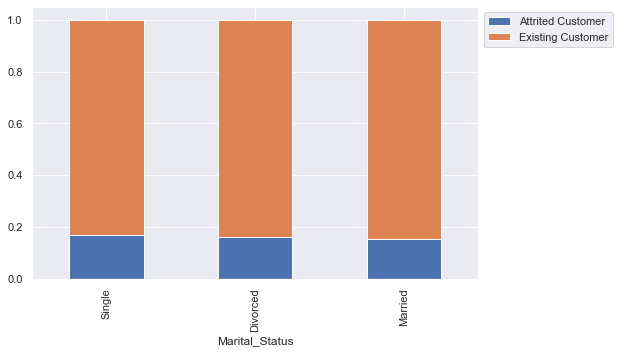

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1440               7573  9013
Less than $40K                 612               2949  3561
$40K - $60K                    271               1518  1789
$80K - $120K                   242               1293  1535
$60K - $80K                    189               1213  1402
$120K +                        126                600   726
------------------------------------------------------------------------------------------------------------------------


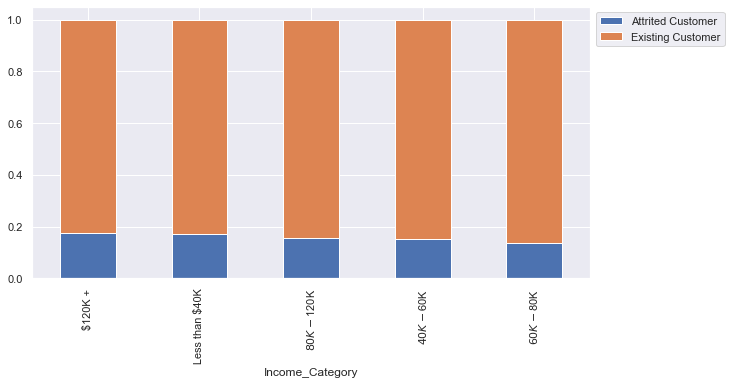

<IPython.core.display.Javascript object>

In [66]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

Irrespective of Marital Status or Income category attrition is same level among various groups

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8497  10124
Blue                         1519               7914   9433
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


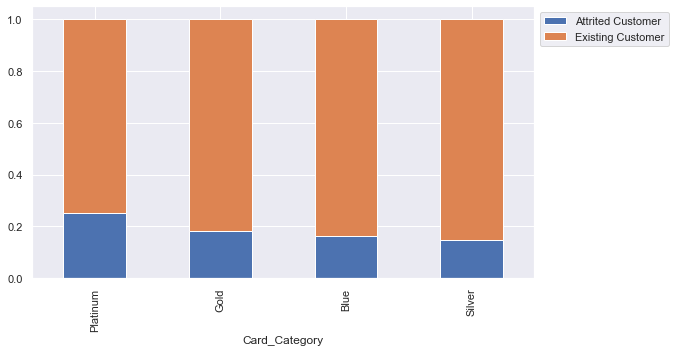

<IPython.core.display.Javascript object>

In [67]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

Attrition rate is slightly higher who take platinum cards with the bank

Card_Category  Blue  Gold  Platinum  Silver    All
Gender                                            
All            9433   116        20     555  10124
M              4333    78        11     345   4767
F              5100    38         9     210   5357
------------------------------------------------------------------------------------------------------------------------


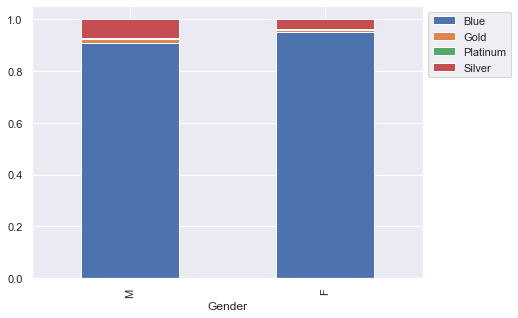

<IPython.core.display.Javascript object>

In [68]:
stacked_barplot(data, "Gender", "Card_Category")

Card_Category   Blue  Gold  Platinum  Silver   All
Marital_Status                                    
All             8750   104        18     503  9375
Single          3624    58        10     251  3943
Married         4430    41         7     206  4684
Divorced         696     5         1      46   748
------------------------------------------------------------------------------------------------------------------------


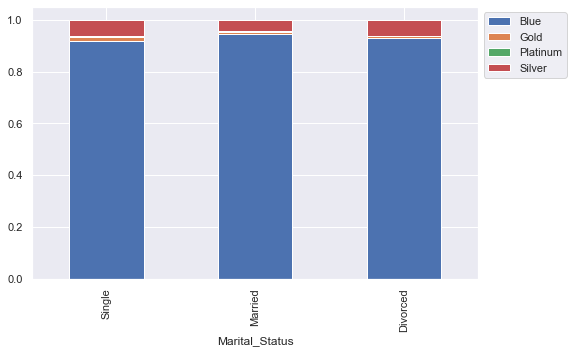

<IPython.core.display.Javascript object>

In [69]:
stacked_barplot(data, "Marital_Status", "Card_Category")

Card_Category    Blue  Gold  Platinum  Silver    All
Dependent_count                                     
All              9433   116        20     555  10124
3                2545    30         8     148   2731
2                2483    28         6     138   2655
4                1441    30         3     100   1574
0                 838     8         2      55    903
1                1738    14         1      84   1837
5                 388     6         0      30    424
------------------------------------------------------------------------------------------------------------------------


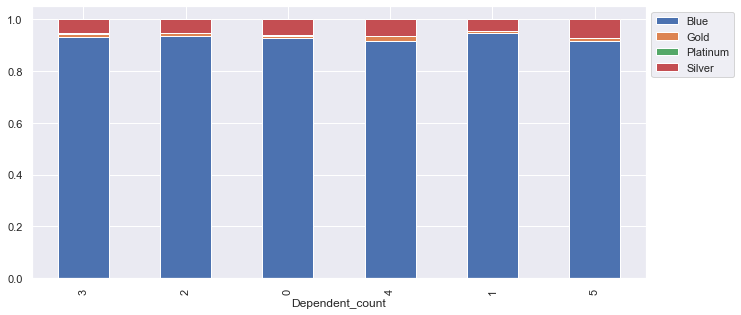

<IPython.core.display.Javascript object>

In [70]:
stacked_barplot(data, "Dependent_count", "Card_Category")

Card_Category    Blue  Gold  Platinum  Silver   All
Income_Category                                    
All              8389   107        15     502  9013
$120K +           644    18         4      60   726
$60K - $80K      1273    29         4      96  1402
Less than $40K   3403    24         4     130  3561
$80K - $120K     1395    21         2     117  1535
$40K - $60K      1674    15         1      99  1789
------------------------------------------------------------------------------------------------------------------------


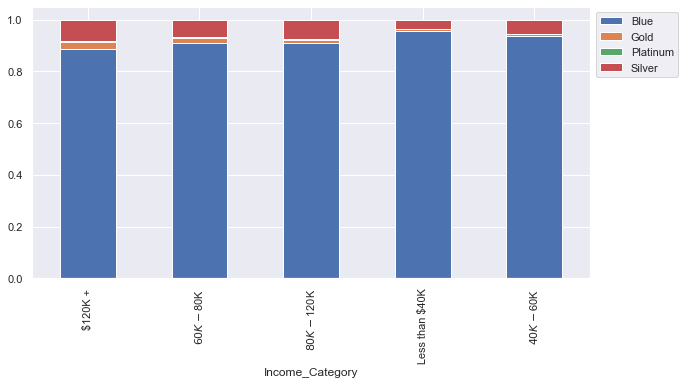

<IPython.core.display.Javascript object>

In [71]:
stacked_barplot(data, "Income_Category", "Card_Category")

Most of the customers prefered blue cards

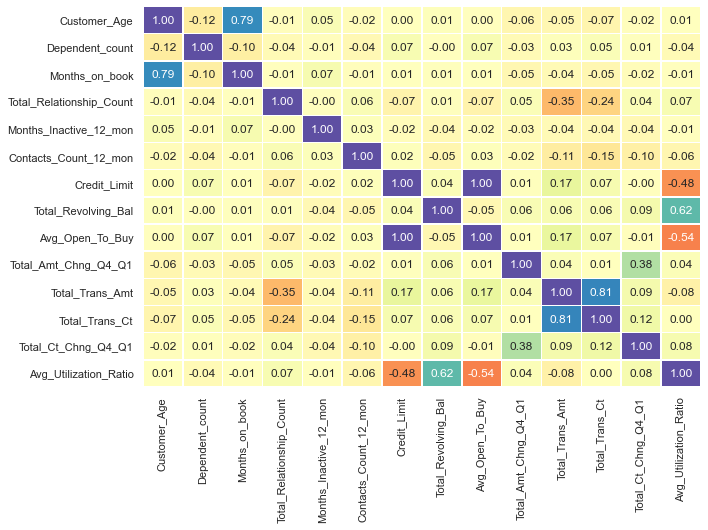

<IPython.core.display.Javascript object>

In [72]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="Spectral",
    fmt="0.2f",
)
plt.show()

Credit_Limit and Avg_Open_To_Buy has perfect correlation and we can remove one of the column for modeling
Avg_Utilization_Ratio and Total_Revolving_Bal have postive correaltion
Total_Trans_Amt and Total_Trans_Ct have positive correlation
Customer_Age and Months_on_book have positive correlation

# Data Preparation for Modeling

In order to minimize the impact of outliers, let us do log transform on few numerical columns

In [73]:
# Take a backup copy
data1 = data.copy()

<IPython.core.display.Javascript object>

In [74]:
# Dropping Contacts_Count_12_mon and Avg_Open_To_Buy columns
data1.drop(
    columns=["Contacts_Count_12_mon", "Avg_Open_To_Buy",], inplace=True,
)

<IPython.core.display.Javascript object>

In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10124 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10124 non-null  object 
 1   Customer_Age              10124 non-null  int64  
 2   Gender                    10124 non-null  object 
 3   Dependent_count           10124 non-null  int64  
 4   Education_Level           8606 non-null   object 
 5   Marital_Status            9375 non-null   object 
 6   Income_Category           9013 non-null   object 
 7   Card_Category             10124 non-null  object 
 8   Months_on_book            10124 non-null  int64  
 9   Total_Relationship_Count  10124 non-null  int64  
 10  Months_Inactive_12_mon    10124 non-null  int64  
 11  Credit_Limit              10124 non-null  float64
 12  Total_Revolving_Bal       10124 non-null  int64  
 13  Total_Amt_Chng_Q4_Q1      10124 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

In [76]:
attrionflag = {"Attrited Customer": 1, "Existing Customer": 0}
data1["Attrition_Flag"] = data1["Attrition_Flag"].map(attrionflag)

<IPython.core.display.Javascript object>

In [77]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
X = pd.get_dummies(X, drop_first=True)

Y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [78]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6074, 27) (2025, 27) (2025, 27)


<IPython.core.display.Javascript object>

In [79]:
imputer = SimpleImputer(strategy="most_frequent")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

## Building the model

### Model evaluation criterion:

Model can go wrong as:
    Predicting a customer will renounce the credit card and the customer doesn't renounce - Loss of resources
    Predicting a customer will not renounce the credit card and the customer renounce the credit card - Loss of opportunity
    
Which is more important?
    Predicting that customer will not renounce but he renounce i.e. losing on a potential source of income for the bank.
    
How to reduce this loss i.e need to reduce False Negatives?
    Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [80]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (6074, 27)
Shape of test set :  (2025, 27)
Percentage of classes in training set:
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
Percentage of classes in test set:
0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


<IPython.core.display.Javascript object>

### Model building

In [81]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("lr", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 43.854526425954994
Bagging: 79.10151753008896
Random forest: 75.716378859236
GBM: 83.50235478806907
Adaboost: 81.45368916797489
dtree: 79.4065934065934

Training Performance:

lr: 43.85245901639344
Bagging: 97.43852459016394
Random forest: 100.0
GBM: 88.42213114754098
Adaboost: 84.22131147540983
dtree: 100.0


<IPython.core.display.Javascript object>

### Model building - Oversampled data

In [82]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [83]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("lr", LogisticRegression(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 60.225104783928316
Bagging: 89.89702269114034
Random forest: 91.71147082911789
GBM: 91.955966661849
Adaboost: 91.07325239678181
dtree: 87.88565303271184

Training Performance:

lr: 61.59882295242765
Bagging: 99.2643452672879
Random forest: 100.0
GBM: 94.65424227562531
Adaboost: 92.05492888670918
dtree: 100.0


<IPython.core.display.Javascript object>

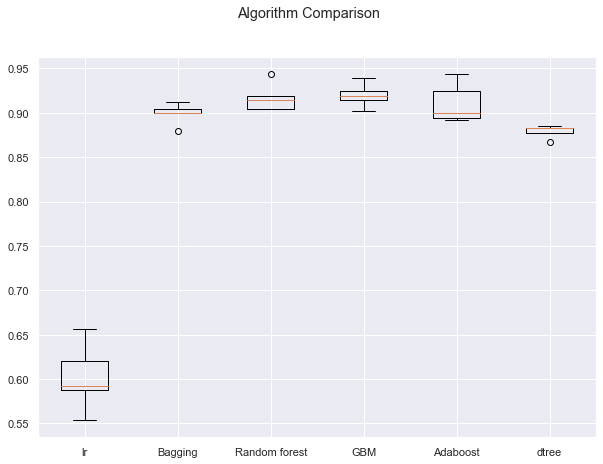

<IPython.core.display.Javascript object>

In [84]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names_over)

plt.show()

GradientBoost is giving the highest cross-validated recall followed by AdaBoost
The boxplot shows that the performance of AdaBoost is consistent without outlier as Adaboost.
The Performance of Adaboost and GradientBoost is highest on cross-validation.

### Model building - Undersampled data

In [85]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [86]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("lr", LogisticRegression(random_state=1)))
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_un:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 78.38095238095238
Bagging: 90.1622187336473
Random forest: 93.0319204604919
GBM: 93.95185766614338
Adaboost: 92.82574568288855
dtree: 86.67974882260599

Training Performance:

lr: 80.02049180327869
Bagging: 98.97540983606558
Random forest: 100.0
GBM: 98.36065573770492
Adaboost: 94.97950819672131
dtree: 100.0


<IPython.core.display.Javascript object>

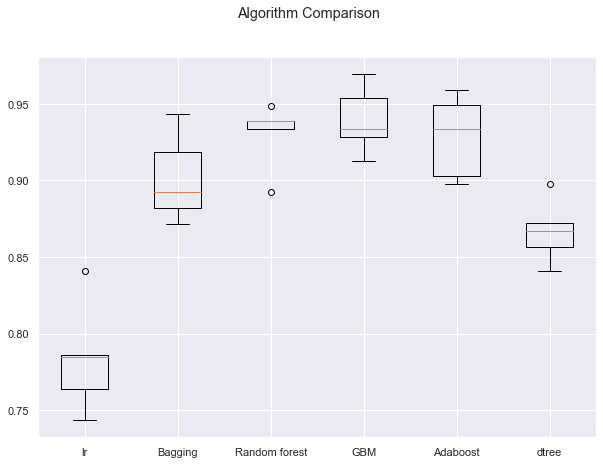

<IPython.core.display.Javascript object>

In [87]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names_un)

plt.show()

We can see that GradientBoost is giving the highest cross-validated recall followed by Random forest and AdaBoost almost same
The boxplot shows that the performance of GradientBoost is consistent without outlier as Adaboost.
The Performance of GradientBoost is highest on cross-validation.


### Choosing Models to tune

Performance of GradientBoost and AdaBoost shows high cross-validation scores compare to other models and without any outliers
Both models performance improved with both over and undersampling data
GradientBoost:-83.5(default), 91.95(with oversampling), 93.95(with undersampling)
Adaboost :- 81.45 (default),91.07(with oevrsampling), 92.82 (with undersampling)

Performance of Bagging is third highest except undersampling where GradientBoost and RandomForst have similar cross-validation scores.
Bagging :- 79.10 (default),89.89(with oevrsampling), 90.16 (with undersampling)
    
We will tune - GradientBoost, Adaboost and Bagging with undersampled data and see if the performance improves.

# Hyperparameter Tuning

In [88]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [89]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### RandomizedSearchCV

### GradientBoosting

In [90]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
random_obj = random_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = random_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

In [91]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_val_perf = model_performance_classification_sklearn(
    gbc_tuned, X_val, y_val
)
print("Validation performance:\n", gbc_tuned_model_val_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.985   0.934      0.970 0.952
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.966   0.856      0.927 0.890


<IPython.core.display.Javascript object>

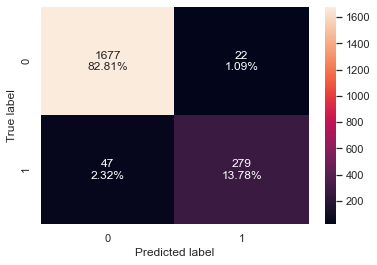

<IPython.core.display.Javascript object>

In [92]:
# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

### AdaBoost

In [93]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
random_obj = random_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = random_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   random_state=1)

<IPython.core.display.Javascript object>

In [94]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_val_perf = model_performance_classification_sklearn(
    abc_tuned, X_val, y_val
)
print("Validation performance:\n", abc_tuned_model_val_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.982   0.929      0.955 0.942
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.965   0.853      0.927 0.888


<IPython.core.display.Javascript object>

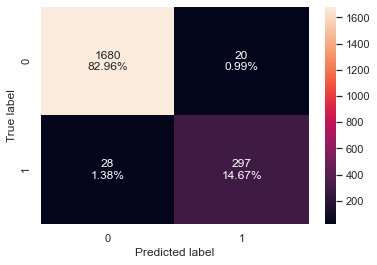

<IPython.core.display.Javascript object>

In [95]:
# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [96]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(
    bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5
)
randomized_cv = randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=40,
                  random_state=1)

<IPython.core.display.Javascript object>

In [97]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_val_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_val, y_val
)
print("Validation performance:\n", bagging_estimator_tuned_model_val_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.999   0.997      0.999 0.998
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.959   0.822      0.915 0.866


<IPython.core.display.Javascript object>

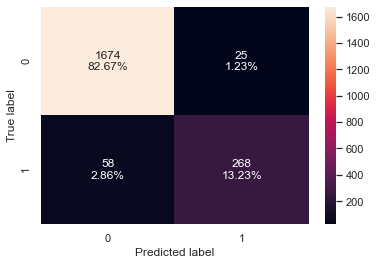

<IPython.core.display.Javascript object>

In [98]:
# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_val, y_val)

## Comparing all models

In [99]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbc_tuned_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GradientBoost Tuned with Random search",
    "AdaBoost Tuned with Random search",
    "Bagging Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,GradientBoost Tuned with Random search,AdaBoost Tuned with Random search,Bagging Tuned with Random Search
Accuracy,0.985,0.982,0.999
Recall,0.934,0.929,0.997
Precision,0.970,0.955,0.999
F1,0.952,0.942,0.998


<IPython.core.display.Javascript object>

In [100]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbc_tuned_model_val_perf.T,
        abc_tuned_model_val_perf.T,
        bagging_estimator_tuned_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "GradientBoost Tuned with Random search",
    "AdaBoost Tuned with Random search",
    "Bagging Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,GradientBoost Tuned with Random search,AdaBoost Tuned with Random search,Bagging Tuned with Random Search
Accuracy,0.966,0.965,0.959
Recall,0.856,0.853,0.822
Precision,0.927,0.927,0.915
F1,0.890,0.888,0.866


<IPython.core.display.Javascript object>

The Gradientboost model tuned using Random search is giving the best validation recall of 0.88.
Let's check the model's performance on test set and then see the feature importance from the tuned Gradientboost model

In [101]:
# Calculating different metrics on the test set
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Test performance:")
gbc_tuned_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.976,0.914,0.937,0.925


<IPython.core.display.Javascript object>

Looking at the performance on test data is generalised and recall score shows model will perform better in production

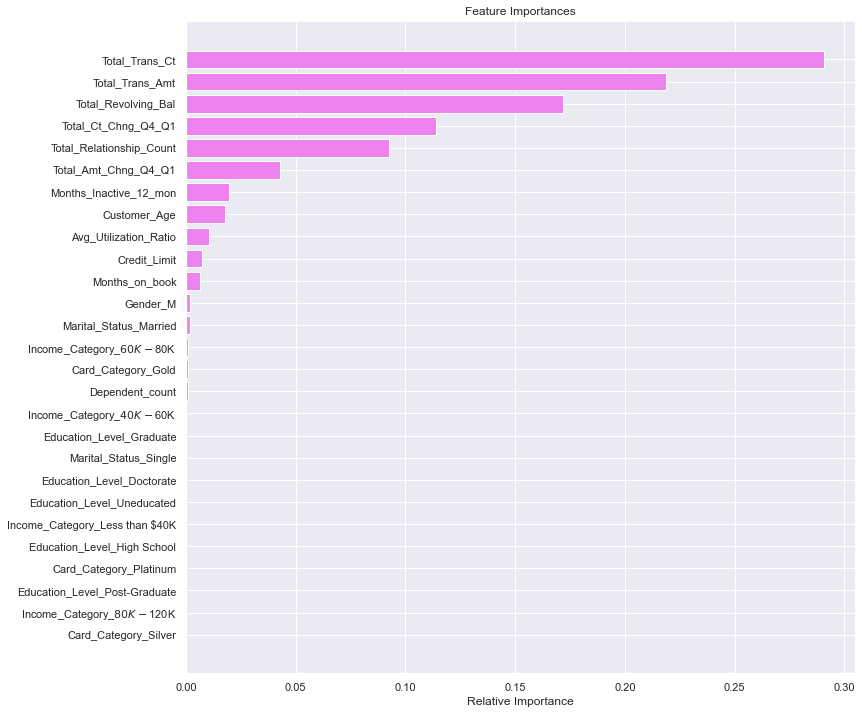

<IPython.core.display.Javascript object>

In [102]:
feature_names = X.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Pipelines for productionizing the model

- Now, we have a final model. let's use pipelines to put the model into production

## Column Transformer

We will use column transformer to transform diffrent columns and the features to be concatenated to form a single feature space
This is useful to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- We will do missing value imputation as pre-processing for numerical columns
- We will do one hot encoding and missing value imputation as pre-processing for categorical columns
- We do imputation for full data will take care of any missing value in future data


In [103]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

<IPython.core.display.Javascript object>

In [104]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
Y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [105]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7086, 17) (3038, 17)


<IPython.core.display.Javascript object>

In [106]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM",
            GradientBoostingClassifier(
                max_features=0.8, n_estimators=250, random_state=1, subsample=0.8,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                             

<IPython.core.display.Javascript object>

In [107]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

# Business Recommendations

- Bank should target to improve services to customers who more frequently use thier credit cards and having good revolving balance
- Attrition rate is higherwith Platinum and Gold card holders. Bank should review the benefits of those two types 
    and it can be adjusted to minimize the attrition
- Most customers use blue cards but at the same time people with higheset income are lower percentage of this bank 
    credit card holders. Bank may need to identity the reason behind this and improve the service to this group. 
    This will not only minimize the attrition with this group but increase more customers
- Based on best model feature importance monitoring total transaction count and transaction amount will help bank 
    if a customer is going to stop using bank card proactively
- Customers who often use bank credit card, should be targeted and offer them more incentives.